# Data Exploration and Text Processing

In [ ]:
!pip install wordcloud
!pip install pandas numpy matplotlib  
!pip install scikit-learn
!pip install emoji
!pip install transformers  
!pip install torch  
!pip install seaborn
!pip install langdetect
!pip install wordninja



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Jackie\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Jackie\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Jackie\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Jackie\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Jackie\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Jackie\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Jackie\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Jackie\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import torch
from torch.utils.data import DataLoader, Dataset
from torch import nn, optim
import re
import pandas as pd
from nltk.corpus import stopwords
import nltk
import wordninja
from sklearn.feature_extraction.text import CountVectorizer
import emoji
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction import text
from langdetect import detect, DetectorFactory
from wordcloud import WordCloud
from langdetect.lang_detect_exception import LangDetectException

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [14]:
csv_path_train = "Corona_NLP_train.csv"

# Use the Python engine and skip any malformed lines
df_train = pd.read_csv(
    csv_path_train,
    encoding="latin-1",
    engine="python",
    on_bad_lines="skip"    # drop lines with unmatched quotes or other parse errors
)

# Show the first 5 rows
print(df_train.head())

   UserName  ScreenName   Location     TweetAt   
0      3799       48751     London  16-03-2020  \
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative  


In [15]:
# Use the Python engine and skip any malformed lines
csv_path_test = "Corona_NLP_test.csv"
df_test = pd.read_csv(
    csv_path_test,
    encoding="latin-1",
    engine="python",
    on_bad_lines="skip"    # drop lines with unmatched quotes or other parse errors
)

# Show the first 5 rows
print(df_test.head())

   UserName  ScreenName             Location     TweetAt   
0         1       44953                  NYC  02-03-2020  \
1         2       44954          Seattle, WA  02-03-2020   
2         3       44955                  NaN  02-03-2020   
3         4       44956          Chicagoland  02-03-2020   
4         5       44957  Melbourne, Victoria  03-03-2020   

                                       OriginalTweet           Sentiment  
0  TRENDING: New Yorkers encounter empty supermar...  Extremely Negative  
1  When I couldn't find hand sanitizer at Fred Me...            Positive  
2  Find out how you can protect yourself and love...  Extremely Positive  
3  #Panic buying hits #NewYork City as anxious sh...            Negative  
4  #toiletpaper #dunnypaper #coronavirus #coronav...             Neutral  


In [16]:
# Displaying the first few rows of the training and test datasets
train_info = df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32809 entries, 0 to 32808
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       32809 non-null  int64 
 1   ScreenName     32809 non-null  int64 
 2   Location       25920 non-null  object
 3   TweetAt        32809 non-null  object
 4   OriginalTweet  32809 non-null  object
 5   Sentiment      32809 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.5+ MB


In [17]:
test_info = df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [18]:
train_head = df_train.head()
train_head

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [19]:
test_head = df_test.head()
test_head

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [20]:
train_description = df_train.describe(include='all')
train_description

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,32809.000000,32809.000000,25920,32809,32809,32809
unique,NaN,NaN,10295,23,32809,5
top,NaN,NaN,"London, England",20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,NaN,NaN,447,3448,1,9021
mean,20203.000000,65155.000000,NaN,NaN,NaN,NaN
std,9471.286827,9471.286827,NaN,NaN,NaN,NaN
min,3799.000000,48751.000000,NaN,NaN,NaN,NaN
25%,12001.000000,56953.000000,NaN,NaN,NaN,NaN
50%,20203.000000,65155.000000,NaN,NaN,NaN,NaN
75%,28405.000000,73357.000000,NaN,NaN,NaN,NaN


In [21]:
test_description = df_test.describe(include='all')
test_description

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,3798.000000,3798.000000,2964,3798,3798,3798
unique,NaN,NaN,1717,15,3798,5
top,NaN,NaN,United States,13-03-2020,TRENDING: New Yorkers encounter empty supermar...,Negative
freq,NaN,NaN,75,1233,1,1041
mean,1899.500000,46851.500000,NaN,NaN,NaN,NaN
std,1096.532489,1096.532489,NaN,NaN,NaN,NaN
min,1.000000,44953.000000,NaN,NaN,NaN,NaN
25%,950.250000,45902.250000,NaN,NaN,NaN,NaN
50%,1899.500000,46851.500000,NaN,NaN,NaN,NaN
75%,2848.750000,47800.750000,NaN,NaN,NaN,NaN


### General Description for Documentation:

This section of the code provides an overview of the dataset by checking its size, listing the column names, and identifying any missing values. It helps in understanding the structure and quality of the data before further analysis.

Conclusion:

It can be observed that there are missing values only in the 'Location' column, accounting for 6889 out of 32,809 entries, which represents approximately 20.99% of the dataset. This indicates that a significant portion of the data in this column is incomplete and may require handling, such as imputation or removal, depending on the analysis requirements.


In [22]:
train_shape = df_train.shape    # Dataset size
train_columns = df_train.columns.tolist()  # Column names
missing_values = df_train.isnull().sum()   # Check for missing values

train_shape, train_columns, missing_values

((32809, 6),
 ['UserName',
  'ScreenName',
  'Location',
  'TweetAt',
  'OriginalTweet',
  'Sentiment'],
 UserName            0
 ScreenName          0
 Location         6889
 TweetAt             0
 OriginalTweet       0
 Sentiment           0
 dtype: int64)

### Sentiment Distribution Analysis and Class Imbalance Assessment

This function analyzes the distribution of the target variable (Sentiment) in the dataset. It calculates the count and percentage of each sentiment class and visualizes the distribution using bar and pie charts. The function also evaluates class imbalance by comparing the maximum and minimum class counts, providing insights into potential issues that might require techniques like stratified sampling or rebalancing for model training.

Conclusion:

Train

From the sentiment distribution, it is evident that there are fewer extreme negative sentiments compared to positive sentiments, with positive sentiments being the most frequent, followed by negative, neutral, extreme positive, and finally, extreme negative sentiments. Initially, we considered the possibility of merging categories due to potential imbalances in the sentiment distribution. However, the data shows that the distribution is relatively balanced, and it would be more meaningful to keep the categories separate for further analysis.

Test

From the sentiment distribution in the test dataset, it is evident that negative sentiments are the most frequent, followed closely by positive sentiments. The less frequent categories—neutral, extremely positive, and extremely negative—appear in relatively similar proportions. Although there is a mild imbalance favoring negative and positive sentiments, the overall distribution is fairly balanced across all five categories. Therefore, we decided to keep all sentiment classes separate for evaluation purposes, rather than merging or removing categories. This approach enables a more detailed and meaningful performance assessment of the model, particularly in capturing nuanced differences in sentiment.

In [59]:
def analyze_target_distribution(target_col='Sentiment'):
    """
    Analyze the distribution of the target variable (Sentiment) in df_train:
    Includes class counts, percentages, visualizations, and imbalance analysis.
    """
    print("\n Target Variable Analysis: Sentiment")
    print("-" * 50)

    if target_col not in df_train.columns:
        print(f" Column '{target_col}' not found in the dataset.")
        return

    # Sentiment counts and percentages
    sentiment_counts = df_train[target_col].value_counts()
    sentiment_props = df_train[target_col].value_counts(normalize=True) * 100

    print("Train - Sentiment Distribution:")
    for label, count in sentiment_counts.items():
        prop = sentiment_props[label]
        print(f"  {label}: {count:,} samples ({prop:.2f}%)")

    # Bar and pie charts
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sentiment_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Train - Sentiment Distribution (Counts)', fontsize=14, fontweight='bold')
    plt.ylabel('Number of Samples')
    plt.xlabel('Sentiment')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
            startangle=90, colors=['lightcoral', 'lightgreen', 'lightskyblue'])
    plt.title('Train - Sentiment Distribution (Proportions)', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Class imbalance analysis
    max_class = sentiment_counts.max()
    min_class = sentiment_counts.min()
    imbalance_ratio = max_class / min_class

    print("\nClass Imbalance Analysis:")
    print(f"  Max/Min class ratio: {imbalance_ratio:.2f}:1")
    if imbalance_ratio > 3:
        print("Significant class imbalance detected – consider stratified sampling or rebalancing.")
    else:
        print("No severe imbalance between classes.")


 Target Variable Analysis: Sentiment
--------------------------------------------------
Train - Sentiment Distribution:
  Positive: 9,021 samples (27.51%)
  Negative: 8,049 samples (24.54%)
  Neutral: 6,040 samples (18.42%)
  Extremely Positive: 5,153 samples (15.71%)
  Extremely Negative: 4,533 samples (13.82%)


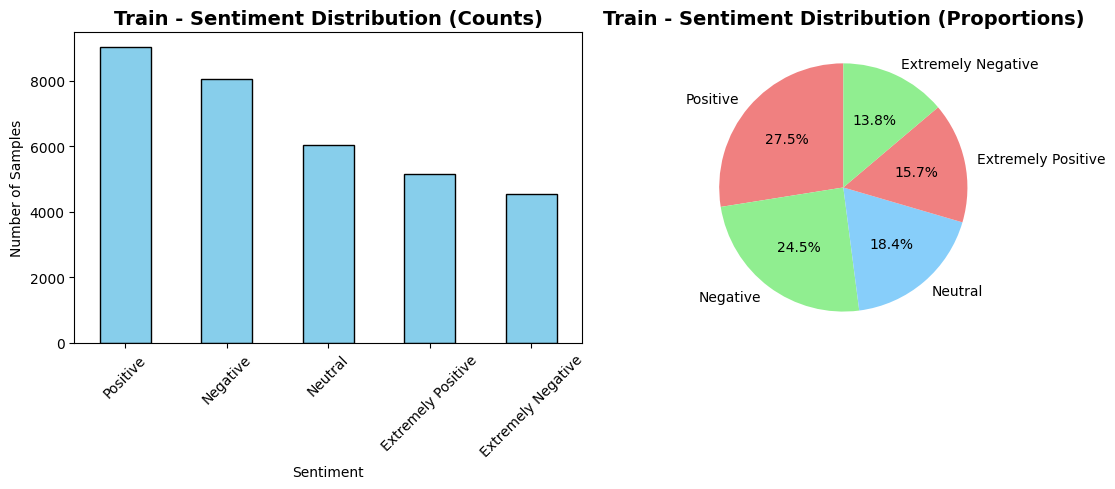


Class Imbalance Analysis:
  Max/Min class ratio: 1.99:1
No severe imbalance between classes.


In [60]:
analyze_target_distribution()


 Target Variable Analysis: Sentiment
--------------------------------------------------
Test - Sentiment Distribution:
  Negative: 1,041 samples (27.41%)
  Positive: 947 samples (24.93%)
  Neutral: 619 samples (16.30%)
  Extremely Positive: 599 samples (15.77%)
  Extremely Negative: 592 samples (15.59%)


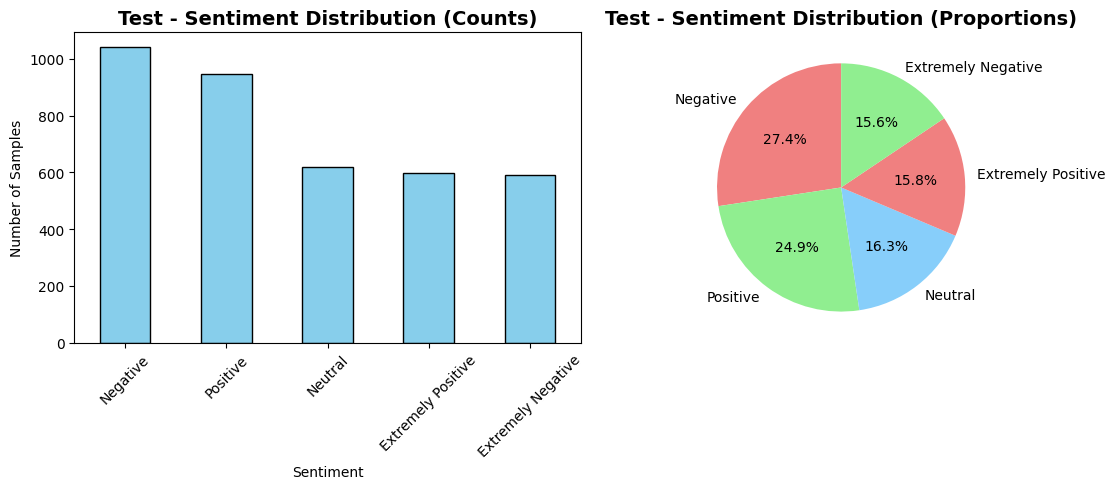


Class Imbalance Analysis:
  Max/Min class ratio: 1.76:1
No severe imbalance between classes.


In [61]:
def analyze_target_distribution(target_col='Sentiment'):
    """
    Analyze the distribution of the target variable (Sentiment) in df_test:
    Includes class counts, percentages, visualizations, and imbalance analysis.
    """
    print("\n Target Variable Analysis: Sentiment")
    print("-" * 50)

    if target_col not in df_test.columns:
        print(f"Column '{target_col}' not found in the dataset.")
        return

    # Sentiment counts and percentages
    sentiment_counts = df_test[target_col].value_counts()
    sentiment_props = df_test[target_col].value_counts(normalize=True) * 100

    print("Test - Sentiment Distribution:")
    for label, count in sentiment_counts.items():
        prop = sentiment_props[label]
        print(f"  {label}: {count:,} samples ({prop:.2f}%)")

    # Bar and pie charts
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sentiment_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Test - Sentiment Distribution (Counts)', fontsize=14, fontweight='bold')
    plt.ylabel('Number of Samples')
    plt.xlabel('Sentiment')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
            startangle=90, colors=['lightcoral', 'lightgreen', 'lightskyblue'])
    plt.title('Test - Sentiment Distribution (Proportions)', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Class imbalance analysis
    max_class = sentiment_counts.max()
    min_class = sentiment_counts.min()
    imbalance_ratio = max_class / min_class

    print("\nClass Imbalance Analysis:")
    print(f"  Max/Min class ratio: {imbalance_ratio:.2f}:1")
    if imbalance_ratio > 3:
        print("Significant class imbalance detected – consider stratified sampling or rebalancing.")
    else:
        print("No severe imbalance between classes.")
analyze_target_distribution()

Examples for Each Sentiment Class test and train

In [26]:
# Displaying three examples for each sentiment
examples_by_sentiment = {}
# Counting how many examples there are for each sentiment
sentiment_counts = df_train['Sentiment'].value_counts()
for sentiment in sentiment_counts.index:
    examples = df_train[df_train['Sentiment'] == sentiment]['OriginalTweet'].head(3).tolist()
    examples_by_sentiment[sentiment] = examples

examples_by_sentiment

{'Positive': ['advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order',
  'Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P',
  "My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j"],
 'Negative': ["For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our home. It's time to fight against COVID 19?. #govindia #IndiaFightsCoro

In [27]:
# Displaying three examples for each sentiment
examples_by_sentiment = {}
# Counting how many examples there are for each sentiment
sentiment_counts = df_test['Sentiment'].value_counts()
for sentiment in sentiment_counts.index:
    examples = df_test[df_train['Sentiment'] == sentiment]['OriginalTweet'].head(3).tolist()
    examples_by_sentiment[sentiment] = examples

examples_by_sentiment

C:\Users\Jackie\AppData\Local\Temp\ipykernel_23064\2148058542.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  examples = df_test[df_train['Sentiment'] == sentiment]['OriginalTweet'].head(3).tolist()
C:\Users\Jackie\AppData\Local\Temp\ipykernel_23064\2148058542.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  examples = df_test[df_train['Sentiment'] == sentiment]['OriginalTweet'].head(3).tolist()
C:\Users\Jackie\AppData\Local\Temp\ipykernel_23064\2148058542.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  examples = df_test[df_train['Sentiment'] == sentiment]['OriginalTweet'].head(3).tolist()
C:\Users\Jackie\AppData\Local\Temp\ipykernel_23064\2148058542.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  examples = df_test[df_train['Sentiment'] == sentiment]['OriginalTweet'].head(3).tolist()
C:\Users\Jackie\AppData\Local\Temp\ipykernel_23064\214805854

{'Negative': ['Anyone been in a supermarket over the last few days? Went to do my NORMAL shop last night &amp; ??is the sight that greeted me. Barmy! (Btw, whatÂ\x92s so special about tinned tomatoes? ????????????). #Covid_19 #Dublin https://t.co/rGsM8xUxr6',
  "Canada'sÂ\xa0oilpatch is bracing for the impact of plunging crude prices afterÂ\xa0OPEC and its allies failed to reach a deal aimed at cutting production as economies slow becauseÂ\xa0of the novel #coronavirus. The fool @Jkenney based his budget on hired oil prices \r\r\n\r\r\nhttps://t.co/fDCpQPvPuo",
  'When your usual grocery shopping @woolworths turns into a toilet paper fight in the supermarket aisle. Yikes. #toiletpaperpanic for the #coronavirus has taken a whole new level. https://t.co/aKJ283I20C'],
 'Positive': ["When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",
  'Find out ho

Checking duplicate rows based on the OriginalTweet column

In [28]:
# Duplicates
dupes = df_train.duplicated(subset=["OriginalTweet"])
print("Duplicates:", dupes.sum())
df_train = df_train[~dupes]

Duplicates: 0


### Tweet Lengths by Sentiment

This code calculates the length of each tweet in the OriginalTweet column and stores it in a new column, tweet_len. It then visualizes the distribution of tweet lengths for each sentiment category using a boxplot. The plot helps in understanding how tweet lengths vary across different sentiment classes.

Conclusion:

Train

It can be observed that all sentiment categories have an average tweet length between 200 and 250 characters, except for the neutral sentiment, which has an average length around 160 characters. This indicates that neutral tweets tend to be shorter compared to other sentiment categories.

Test

In the test dataset, tweet lengths show a similar distribution pattern to the training set. Most sentiment categories have average tweet lengths between 220 and 270 characters, with the neutral sentiment again being noticeably shorter, averaging around 160–170 characters. This consistent pattern suggests that neutral tweets tend to be more concise, while tweets expressing stronger sentiments—either positive or negative—tend to be longer, possibly due to elaboration or emotional expression.

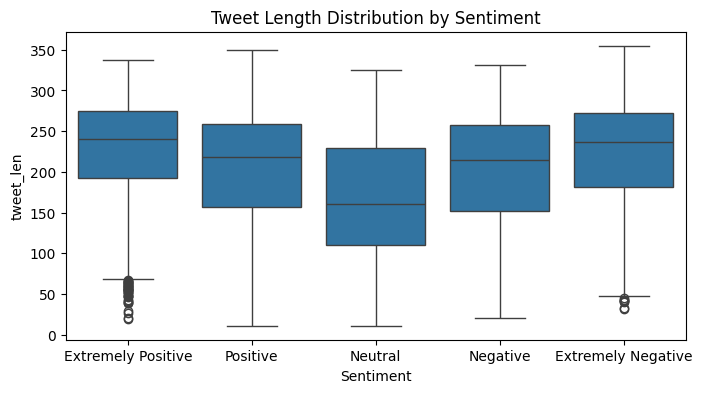

In [29]:
df_train["tweet_len"] = df_train["OriginalTweet"].str.len()

sentiment_order = ["Extremely Positive", "Positive", "Neutral", "Negative", "Extremely Negative"]

plt.figure(figsize=(8,4))
sns.boxplot(x="Sentiment", y="tweet_len", data=df_train, order=sentiment_order)
plt.title("Tweet Length Distribution by Sentiment")
plt.show()

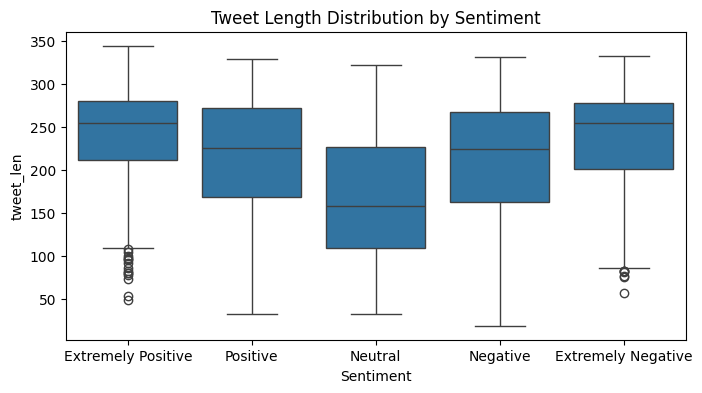

In [30]:
df_test["tweet_len"] = df_test["OriginalTweet"].str.len()

sentiment_order = ["Extremely Positive", "Positive", "Neutral", "Negative", "Extremely Negative"]

plt.figure(figsize=(8,4))
sns.boxplot(x="Sentiment", y="tweet_len", data=df_test, order=sentiment_order)
plt.title("Tweet Length Distribution by Sentiment")
plt.show()

### Text Length Distribution Across Sentiments

This histogram shows the distribution of tweet lengths (in tokens) across sentiment classes.  
Most tweets are under 64 tokens, as marked by the red dashed line.  
Thus, setting during tokenization is efficient and prevents truncation in most cases.


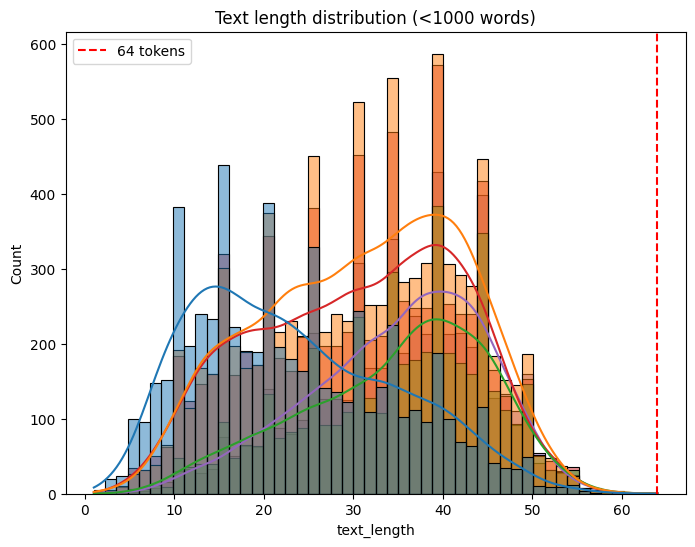

In [31]:
df_train["text_length"] = df_train["OriginalTweet"].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
filter_len = 1_000
sns.histplot(
    df_train[df_train["text_length"] < filter_len],
    x="text_length",
    hue="Sentiment",
    bins=50,
    kde=True,
)
plt.axvline(64, color="red", ls="--", label="64 tokens")
plt.legend()
plt.title("Text length distribution (<1000 words)")
plt.show()

### Links, Hashtags, and Exclamation Marks by Sentiment Frequency


This analysis examines the frequency of links, hashtags, and exclamation marks in tweets across different sentiment categories. It creates three new columns in the dataset: has_link (indicating the presence of links), has_hash (indicating the presence of hashtags), and excl_mark (counting the number of exclamation marks in each tweet). Using bar plots, the average frequency of these features is visualized across different sentiment classes (positive, neutral, and negative).

Conclusions:

Link Frequency:
Extreme negative sentiment tweets have the lowest frequency of links, while neutral sentiment tweets tend to include slightly more links compared to other sentiments.

Hashtag Frequency:
Neutral sentiment tweets show a slightly higher frequency of hashtags compared to positive and extreme negative sentiments, indicating a greater use of hashtags in neutral tweets.

Exclamation Mark Count:
Extreme negative sentiment tweets use the fewest exclamation marks.
Extreme positive and positive sentiments exhibit moderate usage of exclamation marks.
Neutral sentiment tweets have the highest count of exclamation marks, indicating that neutral tweets are relatively more expressive in terms of punctuation.

These findings suggest that sentiment influences the usage of links, hashtags, and punctuation, with neutral sentiment being more expressive in punctuation and hashtags, while extreme sentiments (both positive and negative) tend to be less expressive in punctuation.

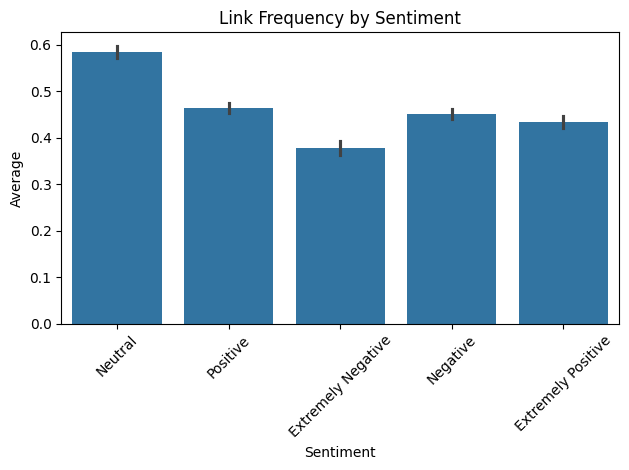

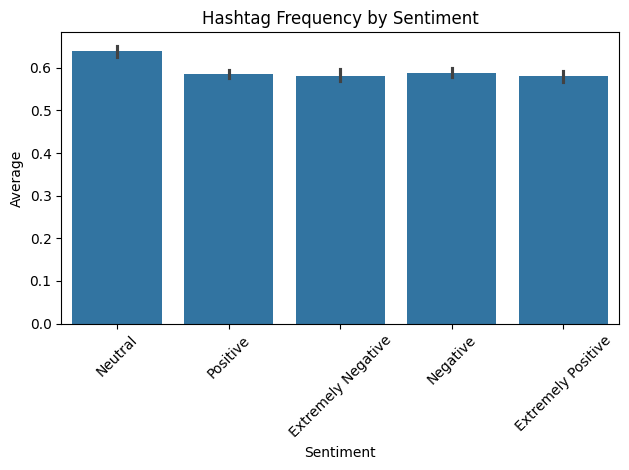

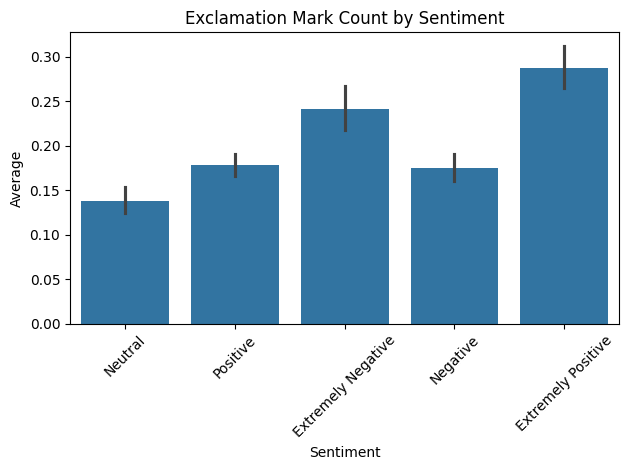

In [32]:
df_train["has_link"]  = df_train["OriginalTweet"].str.contains("http")
df_train["has_hash"]  = df_train["OriginalTweet"].str.contains("#")
df_train["excl_mark"] = df_train["OriginalTweet"].str.count("!")

# Mapping column names to readable titles
title_map = {
    "has_link": "Link Frequency by Sentiment",
    "has_hash": "Hashtag Frequency by Sentiment",
    "excl_mark": "Exclamation Mark Count by Sentiment"
}

for col in ["has_link", "has_hash", "excl_mark"]:
    sns.barplot(x="Sentiment", y=col, data=df_train)
    plt.title(title_map[col])
    plt.xlabel("Sentiment")
    plt.ylabel("Average")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Emoji Analysis

Scans `OriginalTweet` to detect emojis via `emoji.EMOJI_DATA`, count them per tweet, compute averages by sentiment, and list the top-10 per sentiment.
 
- Emoji usage is extremely low (< 0.003 per tweet).  
- Only `©` and `®` appear, not common graphical emojis.  
- Emoji analysis is unlikely to add value for this dataset.


In [ ]:
# Function to count emojis in a given text
def count_emojis(text):
    return sum(1 for char in str(text) if char in emoji.EMOJI_DATA)

# Count emojis for each tweet
df_train["emoji_count"] = df_train["OriginalTweet"].apply(count_emojis)

# Calculate the average number of emojis per tweet for each sentiment
avg_emojis_by_sentiment = df_train.groupby("Sentiment")["emoji_count"].mean()
print(avg_emojis_by_sentiment)

# --- Find all unique emojis in the dataset ---
all_emojis = set(
    char
    for tweet in df_train["OriginalTweet"].astype(str)
    for char in tweet
    if char in emoji.EMOJI_DATA
)

print(f"Found {len(all_emojis)} unique emojis in the dataset:")
print(all_emojis)


##  Top Unigrams for Each Sentiment

This code extracts and displays the top unigrams (single words) used in tweets for each sentiment category (positive, neutral, and negative). Using CountVectorizer, the code tokenizes the tweets in the OriginalTweet column, counts the frequency of each unigram (word), and then ranks them by their frequency. The top 15 most frequent unigrams for each sentiment are displayed. This analysis helps to identify the most common words associated with each sentiment category in the dataset.

It is clear that most of the words repeat across all sentiment categories, with common terms like "coronavirus", "covid", "prices", and "food" appearing frequently, regardless of sentiment.

In [33]:
def top_ngrams(sentiment, n=15, gram=1):
    vec = CountVectorizer(ngram_range=(gram, gram), stop_words='english')
    X = vec.fit_transform(df_train[df_train["Sentiment"]==sentiment]["OriginalTweet"])
    sums = X.sum(axis=0).A1
    vocab = vec.get_feature_names_out()
    top = sorted(zip(sums, vocab), reverse=True)[:n]
    return pd.DataFrame(top, columns=["count", "ngram"])

for s in df_train["Sentiment"].unique():
    print(f"\n-- Top unigrams for {s} --")
    display(top_ngrams(s, gram=1))



-- Top unigrams for Neutral --


,count,ngram
0,4195,https
1,3228,coronavirus
2,1563,19
3,1531,covid
4,1131,store
5,1113,supermarket
6,996,prices
7,989,grocery
8,876,covid19
9,618,consumer



-- Top unigrams for Positive --


,count,ngram
0,5110,https
1,4018,coronavirus
2,2610,19
3,2510,covid
4,1711,store
5,1669,supermarket
6,1643,prices
7,1547,grocery
8,1537,food
9,1250,people



-- Top unigrams for Extremely Negative --


,count,ngram
0,2097,coronavirus
1,2004,https
2,1372,food
3,1354,19
4,1299,covid
5,1126,panic
6,1118,prices
7,1098,people
8,835,supermarket
9,730,amp



-- Top unigrams for Negative --


,count,ngram
0,4305,https
1,3747,coronavirus
2,2315,19
3,2222,covid
4,1939,prices
5,1792,food
6,1472,supermarket
7,1285,store
8,1217,people
9,1153,grocery



-- Top unigrams for Extremely Positive --


,count,ngram
0,2709,https
1,2178,coronavirus
2,1495,19
3,1378,covid
4,1060,store
5,946,supermarket
6,931,amp
7,891,grocery
8,819,food
9,777,prices


Calculates the most frequent words for each sentiment category in the dataset and visualizes them as horizontal bar charts, showing word frequency distribution per sentiment.

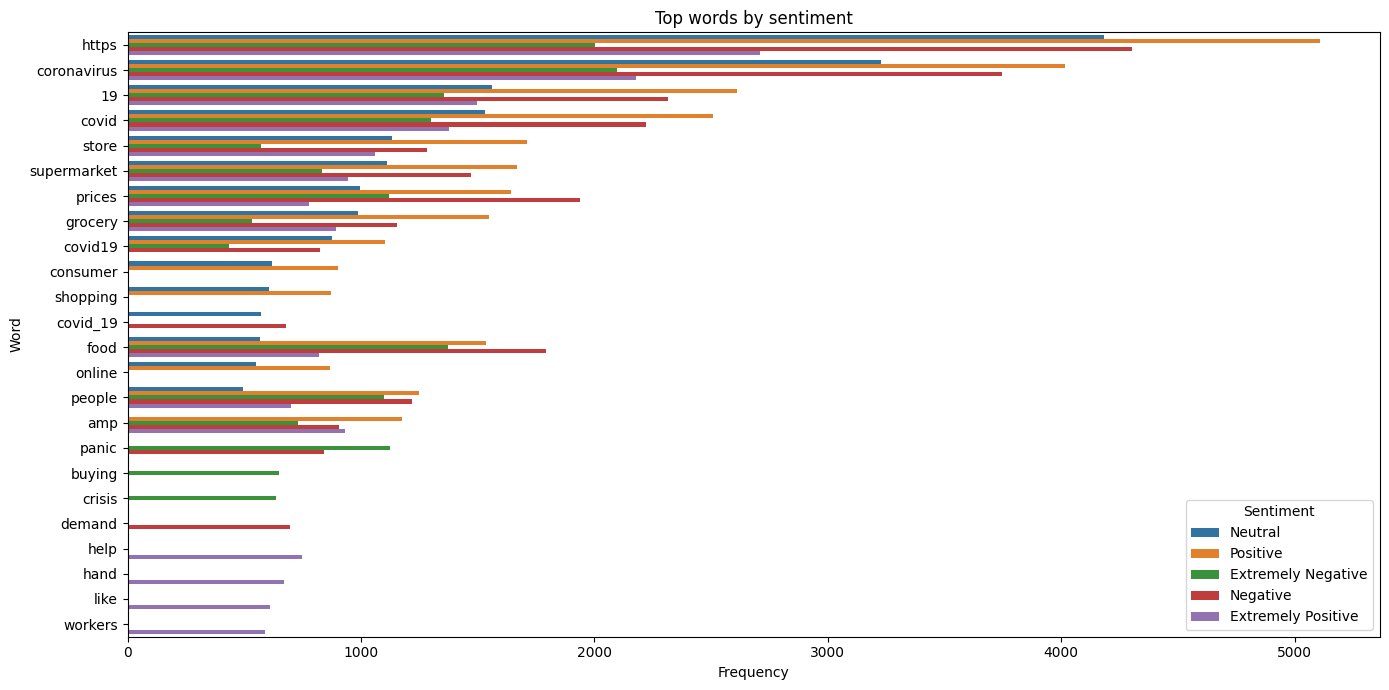

In [ ]:
def get_top_words(df, sentiment, top_n=20):
    vec = CountVectorizer(stop_words='english')
    X = vec.fit_transform(df["OriginalTweet"])
    word_counts = X.sum(axis=0).A1
    vocab = vec.get_feature_names_out()
    word_df = pd.DataFrame(list(zip(vocab, word_counts)), columns=["ngram", "count"])
    word_df["Sentiment"] = sentiment
    return word_df.sort_values(by="count", ascending=False).head(top_n)

top_words_all = pd.concat([
    get_top_words(df_train[df_train["Sentiment"] == s], s, top_n=15)
    for s in df_train["Sentiment"].unique()
])

plt.figure(figsize=(14, 7))
sns.barplot(
    data=top_words_all,
    x="count", y="ngram", hue="Sentiment"
)
plt.title("Top words by sentiment")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


To complement the unigram analysis, we extended the exploration to bigrams (2-word phrases)  
to observe whether common combinations of words emerge within each sentiment.  
This allows us to better understand the specific expressions used across sentiment categories.

It is clear that several bigrams are frequently repeated across all sentiments,  
such as **"covid 19"**, **"grocery store"**, and **"toilet paper"**.  
However, some phrases are sentiment-specific, e.g.,  
**"panic buying"** in negative sentiments, and **"hand sanitizer"**, **"stay safe"** in positive ones.

In [ ]:
def top_ngrams(sentiment, n=15, gram=2):
    vec = CountVectorizer(ngram_range=(gram, gram), stop_words='english')
    X = vec.fit_transform(df_train[df_train["Sentiment"]==sentiment]["OriginalTweet"])
    sums = X.sum(axis=0).A1
    vocab = vec.get_feature_names_out()
    top = sorted(zip(sums, vocab), reverse=True)[:n]
    return pd.DataFrame(top, columns=["count", "ngram"])

for s in df_train["Sentiment"].unique():
    print(f"\n-- Top unigrams for {s} --")
    display(top_ngrams(s, gram=2))



-- Top unigrams for Neutral --


,count,ngram
0,1440,covid 19
1,760,grocery store
2,406,coronavirus https
3,275,coronavirus covid19
4,249,online shopping
5,230,toilet paper
6,194,covid19 coronavirus
7,126,coronavirus pandemic
8,113,19 https
9,108,19 pandemic



-- Top unigrams for Positive --


,count,ngram
0,2405,covid 19
1,1179,grocery store
2,452,coronavirus https
3,429,hand sanitizer
4,326,online shopping
5,314,coronavirus covid19
6,276,covid19 coronavirus
7,273,toilet paper
8,200,19 pandemic
9,157,social distancing



-- Top unigrams for Extremely Negative --


,count,ngram
0,1251,covid 19
1,531,panic buying
2,398,grocery store
3,202,oil prices
4,144,toilet paper
5,136,coronavirus covid19
6,133,coronavirus https
7,123,coronavirus crisis
8,118,stop panic
9,110,19 crisis



-- Top unigrams for Negative --


,count,ngram
0,2140,covid 19
1,889,grocery store
2,398,panic buying
3,353,coronavirus https
4,328,oil prices
5,260,toilet paper
6,249,online shopping
7,230,coronavirus covid19
8,200,covid19 coronavirus
9,182,coronavirus pandemic



-- Top unigrams for Extremely Positive --


,count,ngram
0,1318,covid 19
1,725,grocery store
2,475,hand sanitizer
3,218,coronavirus https
4,195,online shopping
5,157,coronavirus covid19
6,152,covid19 coronavirus
7,140,toilet paper
8,135,stay safe
9,112,store workers


We expanded from bigrams to **trigrams** (three-word sequences).  
This enables a more precise look at full expressions and patterns typical of each sentiment.

It is evident that **"covid 19 pandemic"**, **"grocery store workers"**, and **"amid covid 19"**  
are common across several sentiment categories.  
However, more nuanced phrases such as **"stop panic buying"** or **"make hand sanitizer"**  
appear in specific sentiments, revealing tone and context beyond individual word frequencies.


In [ ]:
def top_ngrams(sentiment, n=15, gram=3):
    vec = CountVectorizer(ngram_range=(gram, gram), stop_words='english')
    X = vec.fit_transform(df_train[df_train["Sentiment"]==sentiment]["OriginalTweet"])
    sums = X.sum(axis=0).A1
    vocab = vec.get_feature_names_out()
    top = sorted(zip(sums, vocab), reverse=True)[:n]
    return pd.DataFrame(top, columns=["count", "ngram"])

for s in df_train["Sentiment"].unique():
    print(f"\n-- Top unigrams for {s} --")
    display(top_ngrams(s, gram=3))



-- Top unigrams for Neutral --


,count,ngram
0,112,covid 19 https
1,106,covid 19 pandemic
2,81,covid 19 coronavirus
3,64,coronavirus covid 19
4,60,covid 19 outbreak
5,45,coronavirus covid19 https
6,40,amid covid 19
7,37,response covid 19
8,37,going grocery store
9,36,covid19 coronavirus https



-- Top unigrams for Positive --


,count,ngram
0,196,covid 19 pandemic
1,115,grocery store workers
2,96,covid 19 https
3,92,covid 19 outbreak
4,80,covid 19 coronavirus
5,74,grocery store employees
6,73,coronavirus covid 19
7,64,covid19 coronavirus https
8,62,spread covid 19
9,56,coronavirus covid19 https



-- Top unigrams for Extremely Negative --


,count,ngram
0,107,covid 19 crisis
1,106,stop panic buying
2,78,covid 19 pandemic
3,47,amid covid 19
4,43,covid 19 panic
5,43,coronavirus covid 19
6,39,people panic buying
7,39,panic buying food
8,34,grocery store workers
9,30,covid 19 https



-- Top unigrams for Negative --


,count,ngram
0,152,covid 19 pandemic
1,89,covid 19 outbreak
2,89,covid 19 https
3,81,amid covid 19
4,78,covid 19 crisis
5,64,coronavirus covid 19
6,61,grocery store workers
7,56,covid 19 coronavirus
8,45,spread covid 19
9,43,fight covid 19



-- Top unigrams for Extremely Positive --


,count,ngram
0,105,grocery store workers
1,100,covid 19 pandemic
2,71,grocery store employees
3,52,covid 19 outbreak
4,48,coronavirus covid 19
5,45,covid 19 coronavirus
6,44,spread covid 19
7,35,workers grocery store
8,35,covid 19 https
9,32,health care workers


We expanded the n-gram analysis to **4-grams** (four-word phrases).  
This allows us to capture complex expressions and multi-word sentiments, often tied to specific situations or narratives.

We observe that while some phrases like **"covid 19 pandemic https"** appear across sentiments,  
others are highly sentiment-specific:  
- Negative examples include **"covid 19 panic buying"** and **"oil prices falling amid"**  
- Positive examples include **"workers grocery store employees"** and **"committed helping customers experiencing"**

These longer expressions provide greater insight into how emotions, opinions, and narratives are conveyed in context.


In [ ]:
def top_ngrams(sentiment, n=15, gram=4):
    vec = CountVectorizer(ngram_range=(gram, gram), stop_words='english')
    X = vec.fit_transform(df_train[df_train["Sentiment"]==sentiment]["OriginalTweet"])
    sums = X.sum(axis=0).A1
    vocab = vec.get_feature_names_out()
    top = sorted(zip(sums, vocab), reverse=True)[:n]
    return pd.DataFrame(top, columns=["count", "ngram"])

for s in df_train["Sentiment"].unique():
    print(f"\n-- Top unigrams for {s} --")
    display(top_ngrams(s, gram=4))



-- Top unigrams for Neutral --


,count,ngram
0,23,covid 19 pandemic https
1,18,amid covid 19 pandemic
2,15,stoppanicbuying coronavirus panicshopping panicbuyinguk
3,15,panicshopping panicbuyinguk coronavirus covid_19
4,15,panicbuyinguk coronavirus covid_19 coronavirusupdate
5,15,covid_19 coronavirusupdate covid19 socialdistanacing
6,15,coronavirus panicshopping panicbuyinguk coronavirus
7,15,coronavirus covid_19 coronavirusupdate covid19
8,14,stopstockpiling stoppanicbuying coronavirus panicshopping
9,14,grocery store coronavirus https



-- Top unigrams for Positive --


,count,ngram
0,30,covid 19 pandemic https
1,24,tested positive covid 19
2,22,covid 19 outbreak https
3,21,toilet paper hand sanitizer
4,15,amid covid 19 pandemic
5,15,amid covid 19 outbreak
6,14,grocery store covid 19
7,13,covid 19 coronavirus https
8,12,healthcare workers grocery store
9,10,workers grocery store employees



-- Top unigrams for Extremely Negative --


,count,ngram
0,22,covid 19 panic buying
1,21,amid covid 19 panic
2,16,people stop panic buying
3,16,grocery workers beginning die
4,15,workers beginning die coronavirus
5,14,veg prices skyrocket amid
6,14,skyrocket amid covid 19
7,14,prices skyrocket amid covid
8,14,people worked walmart trader
9,14,giant died covid 19



-- Top unigrams for Negative --


,count,ngram
0,22,covid 19 pandemic https
1,17,covid 19 panic buying
2,17,amid covid 19 outbreak
3,14,oil prices covid 19
4,14,covid 19 outbreak https
5,13,coronavirus covid19 covid 19
6,12,share profits low crude
7,12,profits low crude oil
8,12,oil prices falling amid
9,12,low crude oil prices



-- Top unigrams for Extremely Positive --


,count,ngram
0,19,workers grocery store employees
1,14,wells fargo committed helping
2,14,helping customers experiencing hardships
3,14,health care workers grocery
4,14,fargo committed helping customers
5,14,experiencing hardships covid 19
6,14,customers experiencing hardships covid
7,14,committed helping customers experiencing
8,14,care workers grocery store
9,13,consumer strong economy strong


### Word Clouds Common Terms Across Sentiments

A **Word Cloud** is a visual representation of the most frequently occurring words in a text dataset.  
The size of each word in the cloud reflects its frequency — larger words appear more often.

In this analysis, we generated separate Word Clouds for each sentiment category to highlight the dominant terms.  
Across all categories, several words stand out as the most frequent and appear prominently in every cloud:

**`https`**, **`covid`**, **`coronavirus`**, and **`supermarket`**

These terms represent the central themes in the dataset and are consistently present, regardless of sentiment.

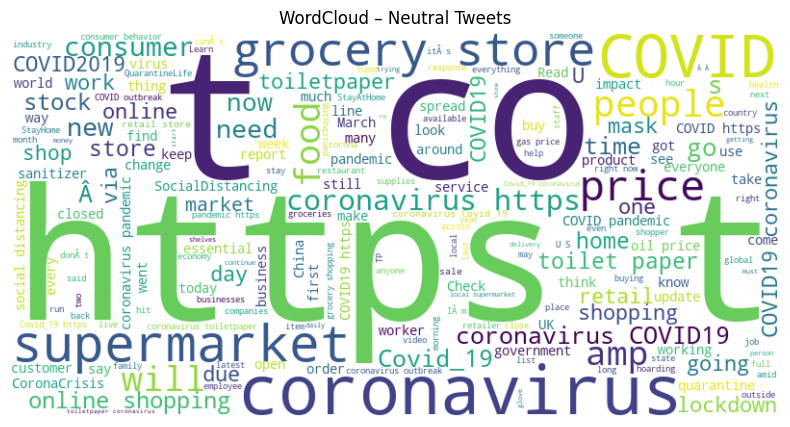

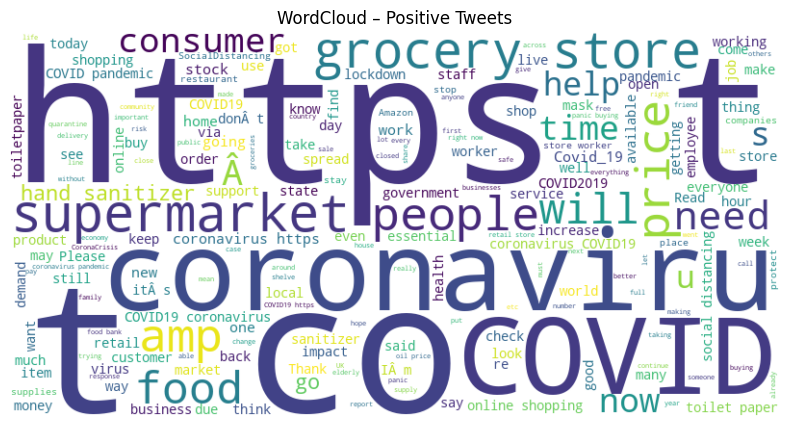

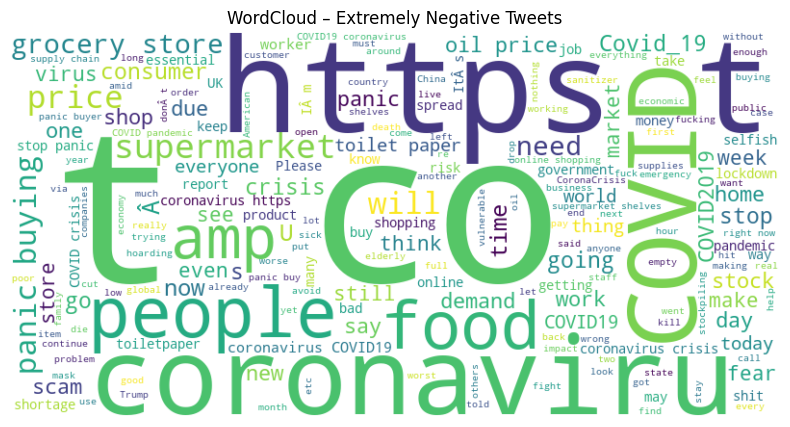

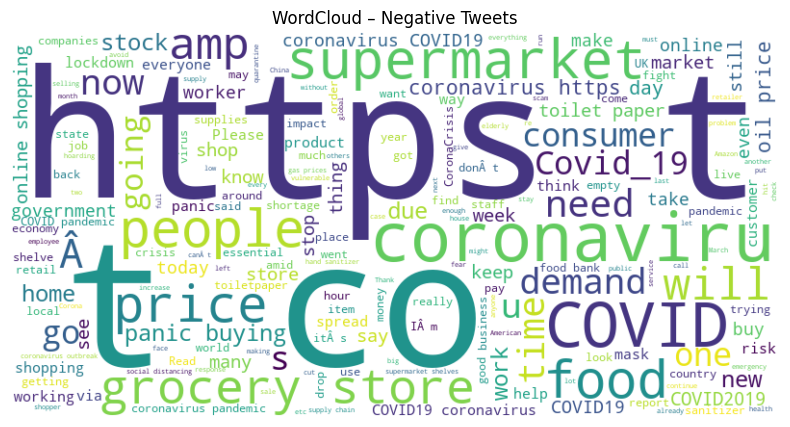

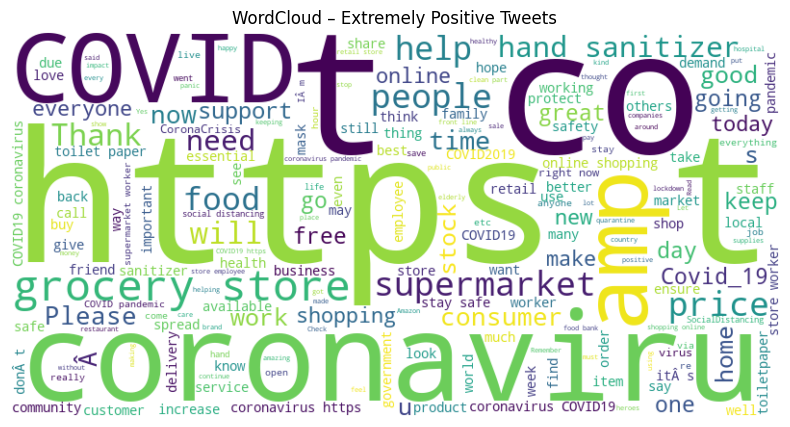

In [ ]:
# Word Clouds by Sentiment  
sentiments = df_train["Sentiment"].unique()

for sentiment in sentiments:
    text = " ".join(df_train[df_train["Sentiment"] == sentiment]["OriginalTweet"])
    
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud – {sentiment} Tweets")
    plt.show()


After checking the most frequent words, we noticed that some appear repeatedly across all categories, so we will remove them to better identify differences.

Conclusion:
The unigram frequency analysis shows that many high-frequency words — such as store, supermarket, grocery, food, prices, people, consumer, shopping, online, need, and covid_19 — appear across all sentiment categories.
Because these terms are common in every category, they provide little value in distinguishing between sentiments.
To improve the identification of truly distinctive words for each sentiment, these recurring terms should be added to the custom stop words list and the analysis rerun.

In [79]:
# Custom stop words to filter out common terms
custom_stop_words = ['covid', '19', 'covid19', 'coronavirus', 'https', 'amp']

def top_ngrams(sentiment, n=15, gram=1):
    vec = CountVectorizer(stop_words='english')
    default_stop_words = set(vec.get_stop_words())


    all_stop_words = list(default_stop_words.union(custom_stop_words))

    vec = CountVectorizer(
        ngram_range=(gram, gram),
        stop_words=all_stop_words
    )

    tweets = df_train[df_train["Sentiment"] == sentiment]["OriginalTweet"]
    X = vec.fit_transform(tweets)
    sums = X.sum(axis=0).A1
    vocab = vec.get_feature_names_out()
    top = sorted(zip(sums, vocab), reverse=True)[:n]
    return pd.DataFrame(top, columns=["count", "ngram"])

In [40]:
for s in df_train["Sentiment"].unique():
    print(f"\n-- Top unigrams for {s} --")
    display(top_ngrams(s, gram=1))


-- Top unigrams for Neutral --


,count,ngram
0,1131,store
1,1113,supermarket
2,996,prices
3,989,grocery
4,618,consumer
5,607,shopping
6,570,covid_19
7,568,food
8,549,online
9,494,people



-- Top unigrams for Positive --


,count,ngram
0,1711,store
1,1669,supermarket
2,1643,prices
3,1547,grocery
4,1537,food
5,1250,people
6,903,consumer
7,871,shopping
8,866,online
9,781,covid_19



-- Top unigrams for Extremely Negative --


,count,ngram
0,1372,food
1,1126,panic
2,1118,prices
3,1098,people
4,835,supermarket
5,648,buying
6,634,crisis
7,571,store
8,534,grocery
9,415,stop



-- Top unigrams for Negative --


,count,ngram
0,1939,prices
1,1792,food
2,1472,supermarket
3,1285,store
4,1217,people
5,1153,grocery
6,842,panic
7,698,demand
8,681,covid_19
9,654,consumer



-- Top unigrams for Extremely Positive --


,count,ngram
0,1060,store
1,946,supermarket
2,891,grocery
3,819,food
4,777,prices
5,748,help
6,699,people
7,672,hand
8,612,like
9,591,workers


Calculates the top distinctive words for each sentiment category using TF-IDF after removing common stop words, to highlight terms that are most representative of each sentiment.  
Additionally, removes high-frequency shared terms found across all categories, such as *store*, *supermarket*, *grocery*, *food*, *prices*, *people*, *consumer*, *shopping*, *online*, and *need*, to further improve sentiment differentiation.

TF-IDF measures how important a word is in a document relative to its frequency across all documents, highlighting distinctive terms.

Removing common stop words and shared frequent terms (e.g., covid, supermarket, store) allowed TF-IDF to reveal more sentiment-specific vocabulary. For example, panic and crisis for Extremely Negative, help and thank for Extremely Positive, demand and pandemic for Negative, hand and workers for Positive, and more neutral terms like retail and toiletpaper for Neutral.

In [ ]:
custom_stopwords = list(text.ENGLISH_STOP_WORDS.union({
    'covid', '19', 'covid19', 'coronavirus', 'https', 'amp', 'co', 'rt', 't','s','â'
}))

sentiment_groups = df_train.groupby("Sentiment")["OriginalTweet"].apply(lambda x: " ".join(x.astype(str)))

vectorizer = TfidfVectorizer(
    stop_words=custom_stopwords,
    max_features=1000,
    token_pattern=r'\b[^\d\W]+\b'  # words only, no numbers or symbols
)

X = vectorizer.fit_transform(sentiment_groups)
feature_names = vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(X.toarray(), index=sentiment_groups.index, columns=feature_names)

In [44]:
def top_tfidf_words(sentiment, n=15):
    row = tfidf_df.loc[sentiment]
    top = row.sort_values(ascending=False).head(n)
    return pd.DataFrame({'word': top.index, 'tfidf_score': top.values})

In [45]:
for sentiment in tfidf_df.index:
    print(f"\n🔹 Top TF-IDF words for: {sentiment}")
    display(top_tfidf_words(sentiment, n=15))


🔹 Top TF-IDF words for: Extremely Negative


,word,tfidf_score
0,food,0.400625
1,panic,0.328793
2,prices,0.326457
3,people,0.320617
4,supermarket,0.243821
5,buying,0.189216
6,crisis,0.185128
7,store,0.166732
8,grocery,0.155928
9,stop,0.121180



🔹 Top TF-IDF words for: Extremely Positive


,word,tfidf_score
0,store,0.292740
1,supermarket,0.261257
2,grocery,0.246067
3,food,0.226183
4,prices,0.214584
5,help,0.206575
6,people,0.193043
7,hand,0.185586
8,like,0.169016
9,workers,0.163216



🔹 Top TF-IDF words for: Negative


,word,tfidf_score
0,prices,0.388426
1,food,0.358979
2,supermarket,0.294875
3,store,0.257415
4,people,0.243793
5,grocery,0.230972
6,panic,0.168672
7,demand,0.139825
8,consumer,0.131011
9,shopping,0.122397



🔹 Top TF-IDF words for: Neutral


,word,tfidf_score
0,store,0.374114
1,supermarket,0.368160
2,prices,0.329458
3,grocery,0.327143
4,consumer,0.204423
5,shopping,0.200784
6,food,0.187884
7,online,0.181599
8,people,0.163406
9,toiletpaper,0.150505



🔹 Top TF-IDF words for: Positive


,word,tfidf_score
0,store,0.311190
1,supermarket,0.303551
2,prices,0.298822
3,grocery,0.281362
4,food,0.279543
5,people,0.227345
6,consumer,0.164234
7,shopping,0.158414
8,online,0.157504
9,like,0.136589


Analyzing Sentiment Trends Over Time (EDA)
In this step, we analyze how sentiment labels change over time to detect potential biases.

We check whether:
Some days have extreme spikes in specific sentiments
Sentiment distribution is stable or varies
Certain sentiments appear only on specific dates
These insights help decide whether to remove extreme dates, merge rare labels, or balance the dataset before modeling.

In [48]:
# Convert TweetAt to datetime with day first (DD/MM/YYYY format)
df_train["date"] = pd.to_datetime(df_train["TweetAt"], dayfirst=True)

# Print date range summary
print("Earliest date:", df_train["date"].min().strftime("%d/%m/%Y"))
print("Latest date:", df_train["date"].max().strftime("%d/%m/%Y"))
print("Number of unique dates:", df_train["date"].nunique())

Earliest date: 16/03/2020


Latest date: 07/04/2020
Number of unique dates: 23


In [49]:
df_train["TweetAt"].unique()

array(['16-03-2020', '17-03-2020', '18-03-2020', '19-03-2020',
       '20-03-2020', '21-03-2020', '22-03-2020', '23-03-2020',
       '24-03-2020', '25-03-2020', '26-03-2020', '27-03-2020',
       '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020',
       '01-04-2020', '02-04-2020', '03-04-2020', '04-04-2020',
       '05-04-2020', '06-04-2020', '07-04-2020'], dtype=object)

Sentiment Trend Over Time 3-Day Moving Average

This line chart shows the trend of tweet sentiment over time, using a **3-day moving average** to smooth out daily fluctuations.  
The x-axis represents the date (from mid-March to early April 2020), and the y-axis shows the smoothed tweet count for each sentiment category.

The chart reveals a **consistent pattern across all sentiment categories**:
- A **sharp rise** in tweet activity around March 20  
- Followed by a **notable decline** toward the end of the month  
- And a **gradual recovery** in early April

The similarity in trend across sentiments suggests that public attention and discussion volume were influenced by shared external events, regardless of emotional tone.

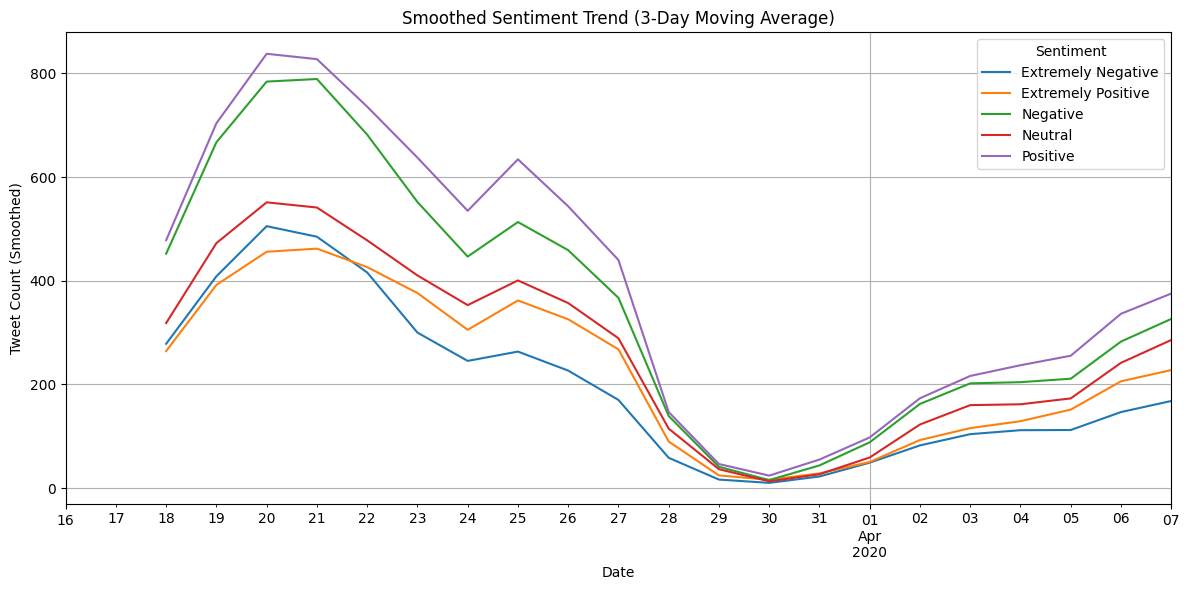

In [ ]:
# Convert 'TweetAt' column to datetime (day first, e.g., 13-03-2020)
df_train["date"] = pd.to_datetime(df_train["TweetAt"], dayfirst=True)

# Group by date and sentiment, count occurrences
daily = df_train.groupby(["date", "Sentiment"]).size().unstack(fill_value=0)

# Plot smoothed trend (3-day moving average)
daily.rolling(3).mean().plot(figsize=(12, 6))
plt.title("Smoothed Sentiment Trend (3-Day Moving Average)")
plt.xlabel("Date")
plt.ylabel("Tweet Count (Smoothed)")
plt.grid(True)
plt.tight_layout()
plt.show()


Sentiment Trend Over Time 7-Day Moving Average

This chart shows tweet sentiment trends using a 7-day moving average.  
There is a rise until late March, a sharp drop around April 1st, followed by a gradual recovery.  
The pattern is consistent across all sentiment categories, suggesting a shared external influence.

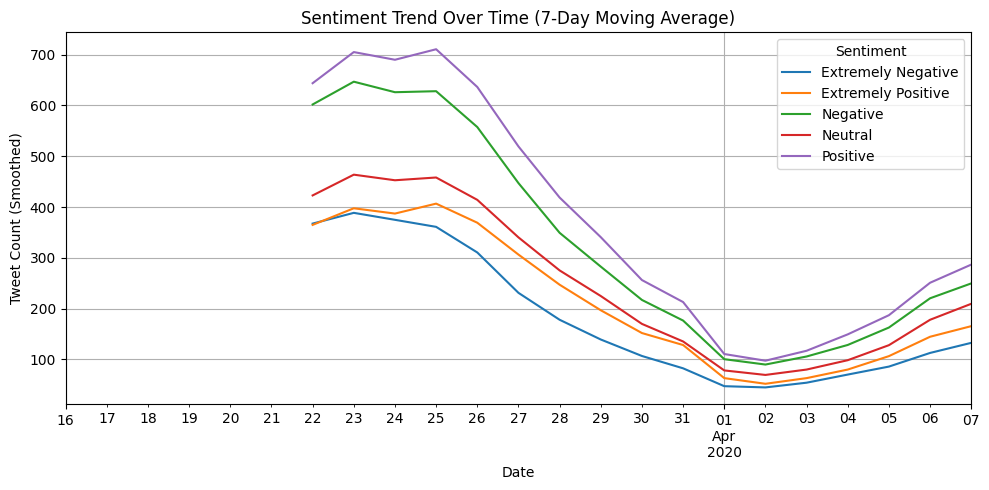

In [51]:
df_train["date"] = pd.to_datetime(df_train["TweetAt"], dayfirst=True)
daily = df_train.groupby(["date", "Sentiment"]).size().unstack(fill_value=0)
daily.rolling(7).mean().plot(figsize=(10,5))
plt.title("Sentiment Trend Over Time (7-Day Moving Average)")
plt.xlabel("Date")
plt.ylabel("Tweet Count (Smoothed)")
plt.grid(True)
plt.tight_layout()
plt.show()


### Sentiment Distribution by Top 10 Locations

This stacked bar chart shows the **percentage distribution of tweet sentiments** across the **10 most frequent locations** in the dataset.  
Each bar represents a location, and the different colors indicate the proportion of each sentiment (Positive, Neutral, Negative, etc.).

The visualization helps identify how sentiment varies geographically. While the proportions are relatively balanced across locations, we can see that all locations include a mix of positive and negative sentiments.

* Approximately **20% of the tweets are missing location data**


In [52]:
def sentiment_by_location(df, location_col='Location', sentiment_col='Sentiment', top_n=10):
    """
    Analyze top locations and sentiment distribution by location
    
    Parameters:
        df: DataFrame containing tweet data
        location_col: Name of the column with location info
        sentiment_col: Name of the column with sentiment labels
        top_n: Number of top locations to display
    """
    print("\nSentiment Analysis by Location")
    print("-" * 40)
    
    # Drop rows with missing or empty locations
    df = df[df[location_col].notnull() & (df[location_col].str.strip() != '')].copy()

    # Clean up locations: remove whitespace, standardize casing
    df[location_col] = df[location_col].str.strip().str.lower()

    # Top N frequent locations
    top_locations = df[location_col].value_counts().head(top_n).index.tolist()

    # Filter only top N locations
    df_top = df[df[location_col].isin(top_locations)]

    # Cross-tab of Sentiment vs Location
    loc_sentiment = pd.crosstab(df_top[location_col], df_top[sentiment_col], normalize='index') * 100

    # Plot
    loc_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
    plt.title(f'Sentiment Distribution by Top {top_n} Locations', fontsize=14, fontweight='bold')
    plt.ylabel('Percentage')
    plt.xlabel('Location')
    plt.xticks(rotation=45)
    plt.legend(title='Sentiment')
    plt.tight_layout()
    plt.show()
    
    print(f"\nTop {top_n} Locations by Tweet Volume:")
    print(df[location_col].value_counts().head(top_n))



Sentiment Analysis by Location
----------------------------------------


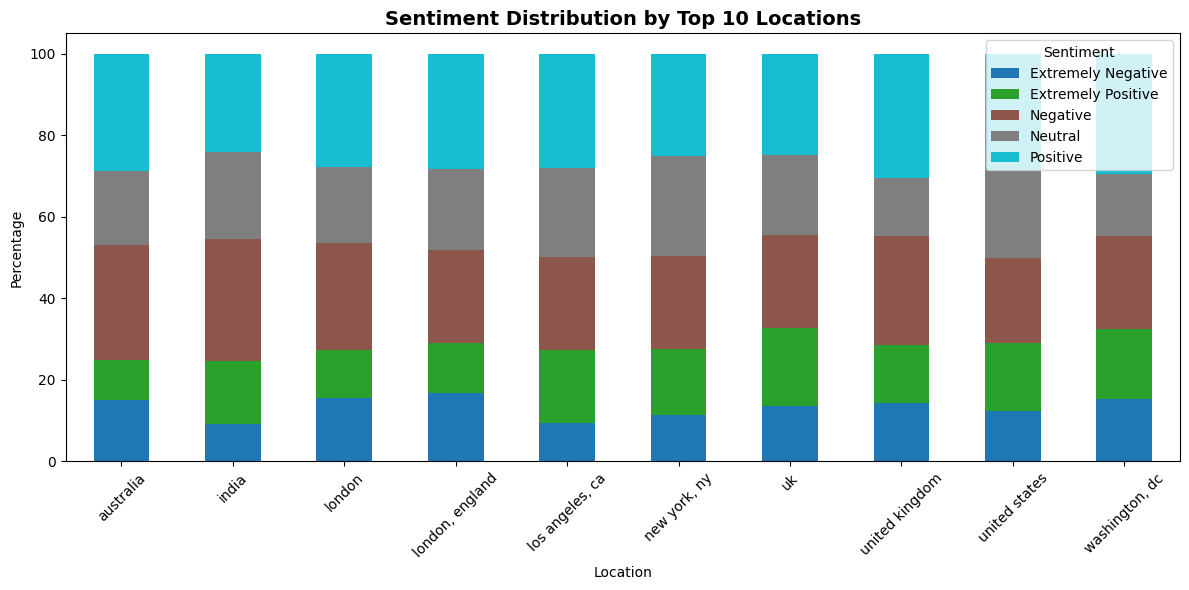


Top 10 Locations by Tweet Volume:
Location
london             472
london, england    450
united states      404
new york, ny       308
united kingdom     295
washington, dc     287
los angeles, ca    235
uk                 230
india              207
australia          192
Name: count, dtype: int64


In [53]:
sentiment_by_location(df_train, location_col='Location', sentiment_col='Sentiment', top_n=10)

In [ ]:
DetectorFactory.seed = 0 # For reproducibility

def detect_lang(text):
    try:
        return detect(text)
    except:
        return "error"

df_train['language'] = df_train['OriginalTweet'].astype(str).apply(detect_lang)

# Displaying the distribution of languages in the training dataset
print(df_train['language'].value_counts())


language
en       32630
fr          30
es          24
de          23
no          13
error       13
it          11
tl           9
ca           8
id           7
et           6
af           6
ro           5
da           5
nl           4
pt           2
sv           2
tr           2
sk           2
fi           2
lt           1
cy           1
pl           1
sl           1
vi           1
Name: count, dtype: int64


A small number of tweets could not be processed due to language detection errors.  
These were labeled as `"error"` and excluded from the analysis.

In [ ]:
DetectorFactory.seed = 0

def detect_lang(text):
    try:
        return detect(str(text))
    except LangDetectException:
        return 'error'

# Apply language detection to the 'OriginalTweet' column
df_train['language'] = df_train['OriginalTweet'].apply(detect_lang)
df_test['language'] = df_test['OriginalTweet'].apply(detect_lang)

# Displaying the distribution of languages in the training dataset
errors = df_train[df_train['language'] == 'error']
print(f"Found {len(errors)} tweets with language detection errors:\n")
for i, row in errors.head(5).iterrows():
    print(f"{i}. {row['OriginalTweet']}")


Found 0 tweets with language detection errors:



# Preprocessing

### Language Detection in Tweets

We applied a language detection algorithm to the tweet texts in order to identify the languages present in the dataset.  
The results show that the vast majority of tweets (over 32,000) are written in **English (`en`)**,  
while all other languages (such as French, Spanish, German, etc.) appear only in very small numbers.

> Therefore, for consistency and data cleaning, we decided to **keep only English tweets** and remove the rest.

In [67]:
# Filter out rows where language detection failed
df_train = df_train[df_train['language'] != 'error'].copy()
df_test = df_test[df_test['language'] != 'error'].copy()

# Keep only English tweets
df_train = df_train[df_train['language'] == 'en'].copy()
df_test = df_test[df_test['language'] == 'en'].copy()

### Tweet Text Cleaning (EDA)
We normalize tweet text for exploratory analysis:
- Replace URLs with a placeholder: `http`
- Anonymize mentions: `@user`
- Split hashtags into words (via `wordninja`): `#StayHome` → `stay home`
- Collapse extra whitespace

Applied to both **df_train** and **df_test** (column: `clean_text`) to keep preprocessing consistent.

In [92]:
def clean_tweet_for_eda(text):
    text = str(text).lower()                           # convert to lowercase
    text = re.sub(r'http\S+', 'http', text)            # URLs
    text = re.sub(r'@\w+', '@user', text)              # mentions

    def split_hashtag(m):
        return ' '.join(wordninja.split(m.group(1)))
    text = re.sub(r'#(\w+)', split_hashtag, text)      # split hashtags

    text = re.sub(r"\s+", " ", text).strip()           # extra spaces
    return text

# Apply the cleaning function to the 'OriginalTweet' column
df_train['clean_text'] = df_train['OriginalTweet'].apply(clean_tweet_for_eda)
df_test['clean_text'] = df_test['OriginalTweet'].apply(clean_tweet_for_eda)

### Displaying Original and Cleaned Tweets

Adjusted pandas display settings to show all columns and full text without truncation.  
Displayed the first 5 rows from both **df_train** and **df_test** to compare  
the original tweets (`OriginalTweet`) with their cleaned versions (`clean_text`).

In [93]:
# Displaying the first few rows of the cleaned training and test datasets
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.width', None) 

print("Train Data Sample:")
print(df_train[['OriginalTweet', 'clean_text']].head(5))

print("\nTest Data Sample:")
print(df_test[['OriginalTweet', 'clean_text']].head(5))

Train Data Sample:
                                                                                                                                                                                                                                                                                                                        OriginalTweet   
0                                                                                                                                                                                                                     @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8  \
1                                                                                       advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over ord

### Removing Empty or Link-Only Tweets

We filtered out rows from both **df_train** and **df_test** where the cleaned text was either empty  
or contained only a URL placeholder (`http`). This step ensures that all remaining tweets  
have meaningful textual content for analysis.

After preprocessing, we specifically searched for such rows and confirmed that none remained.

In [76]:
# before processing
before_train = len(df_train)
before_test = len(df_test)

# Remove empty or 'http'-only tweets
df_train = df_train[
    (df_train['clean_text'].str.strip().astype(bool)) &
    (df_train['clean_text'].str.lower().str.strip() != 'http')
].copy()

df_test = df_test[
    (df_test['clean_text'].str.strip().astype(bool)) &
    (df_test['clean_text'].str.lower().str.strip() != 'http')
].copy()

# after processing
after_train = len(df_train)
after_test = len(df_test)

print(f"df_train: before: {before_train} | after: {after_train} | deleted: {before_train - after_train}")
print(f"df_test: before: {before_test} | after: {after_test} | deleted: {before_test - after_test}")

df_train: before: 32630 | after: 32630 | deleted: 0
df_test: before: 3787 | after: 3787 | deleted: 0


saving the cleaned datasets train and test

In [ ]:
df_train.to_csv('train_cleaned.csv', index=False, encoding='utf-8')

df_test.to_csv('test_cleaned.csv', index=False, encoding='utf-8')